# CS109a Final Project - Group 50 (https://zhi-hui.github.io/finalproject/)
#### Yuxi Liu, Min-Jung Wang, Zhihui Wang, and  Qianyu Yuan

# Part 1. EDA

## 0. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')

## 1. Load data

In [2]:
# Load data - the data is pre-processed
data = pd.read_csv('model.csv')

# Create a binary variable for maritial status
data['PTMARRY'] = np.where(data['PTMARRY']=='Married','Married','Unmarried')

# Split data into training and test set - All the EDA are performed on the training set
np.random.seed(9001)
msk = np.random.rand(len(data)) < 0.6
data_train = data[msk]
data_test = data[~msk]

### Outcome: reversion back to cognitively normal among MCI patients over 2 years 


In [3]:
print ("Probability of reversion in the training set is %f "%(data_train['MCI_reversion_2y'].mean()))

Probability of reversion in the training set is 0.058824 


## 2. Perform EDA to select potential predictors

### a. Demographics Characteristics 

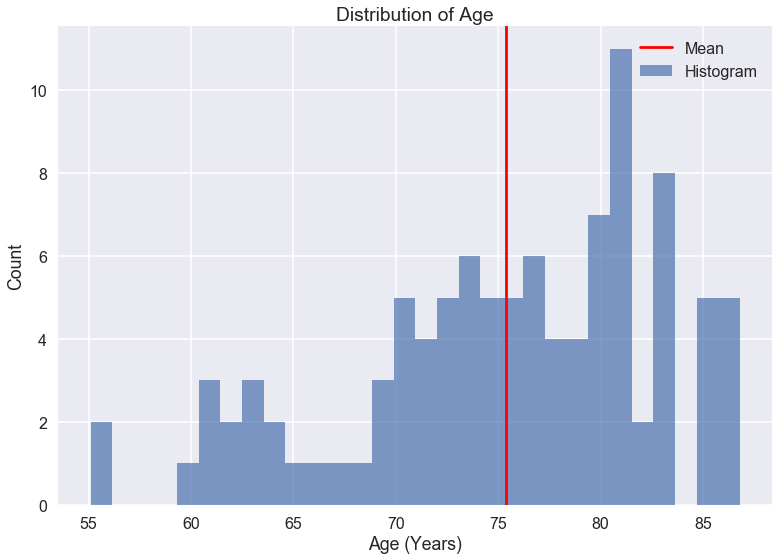

In [4]:
# Distribution of age
plt.hist(data_train['AGE'], alpha=0.7, bins=30, label='Histogram')
plt.title('Distribution of Age')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.axvline(data_train.AGE.mean(), 0, 1.0, color='red', label='Mean')
plt.legend();

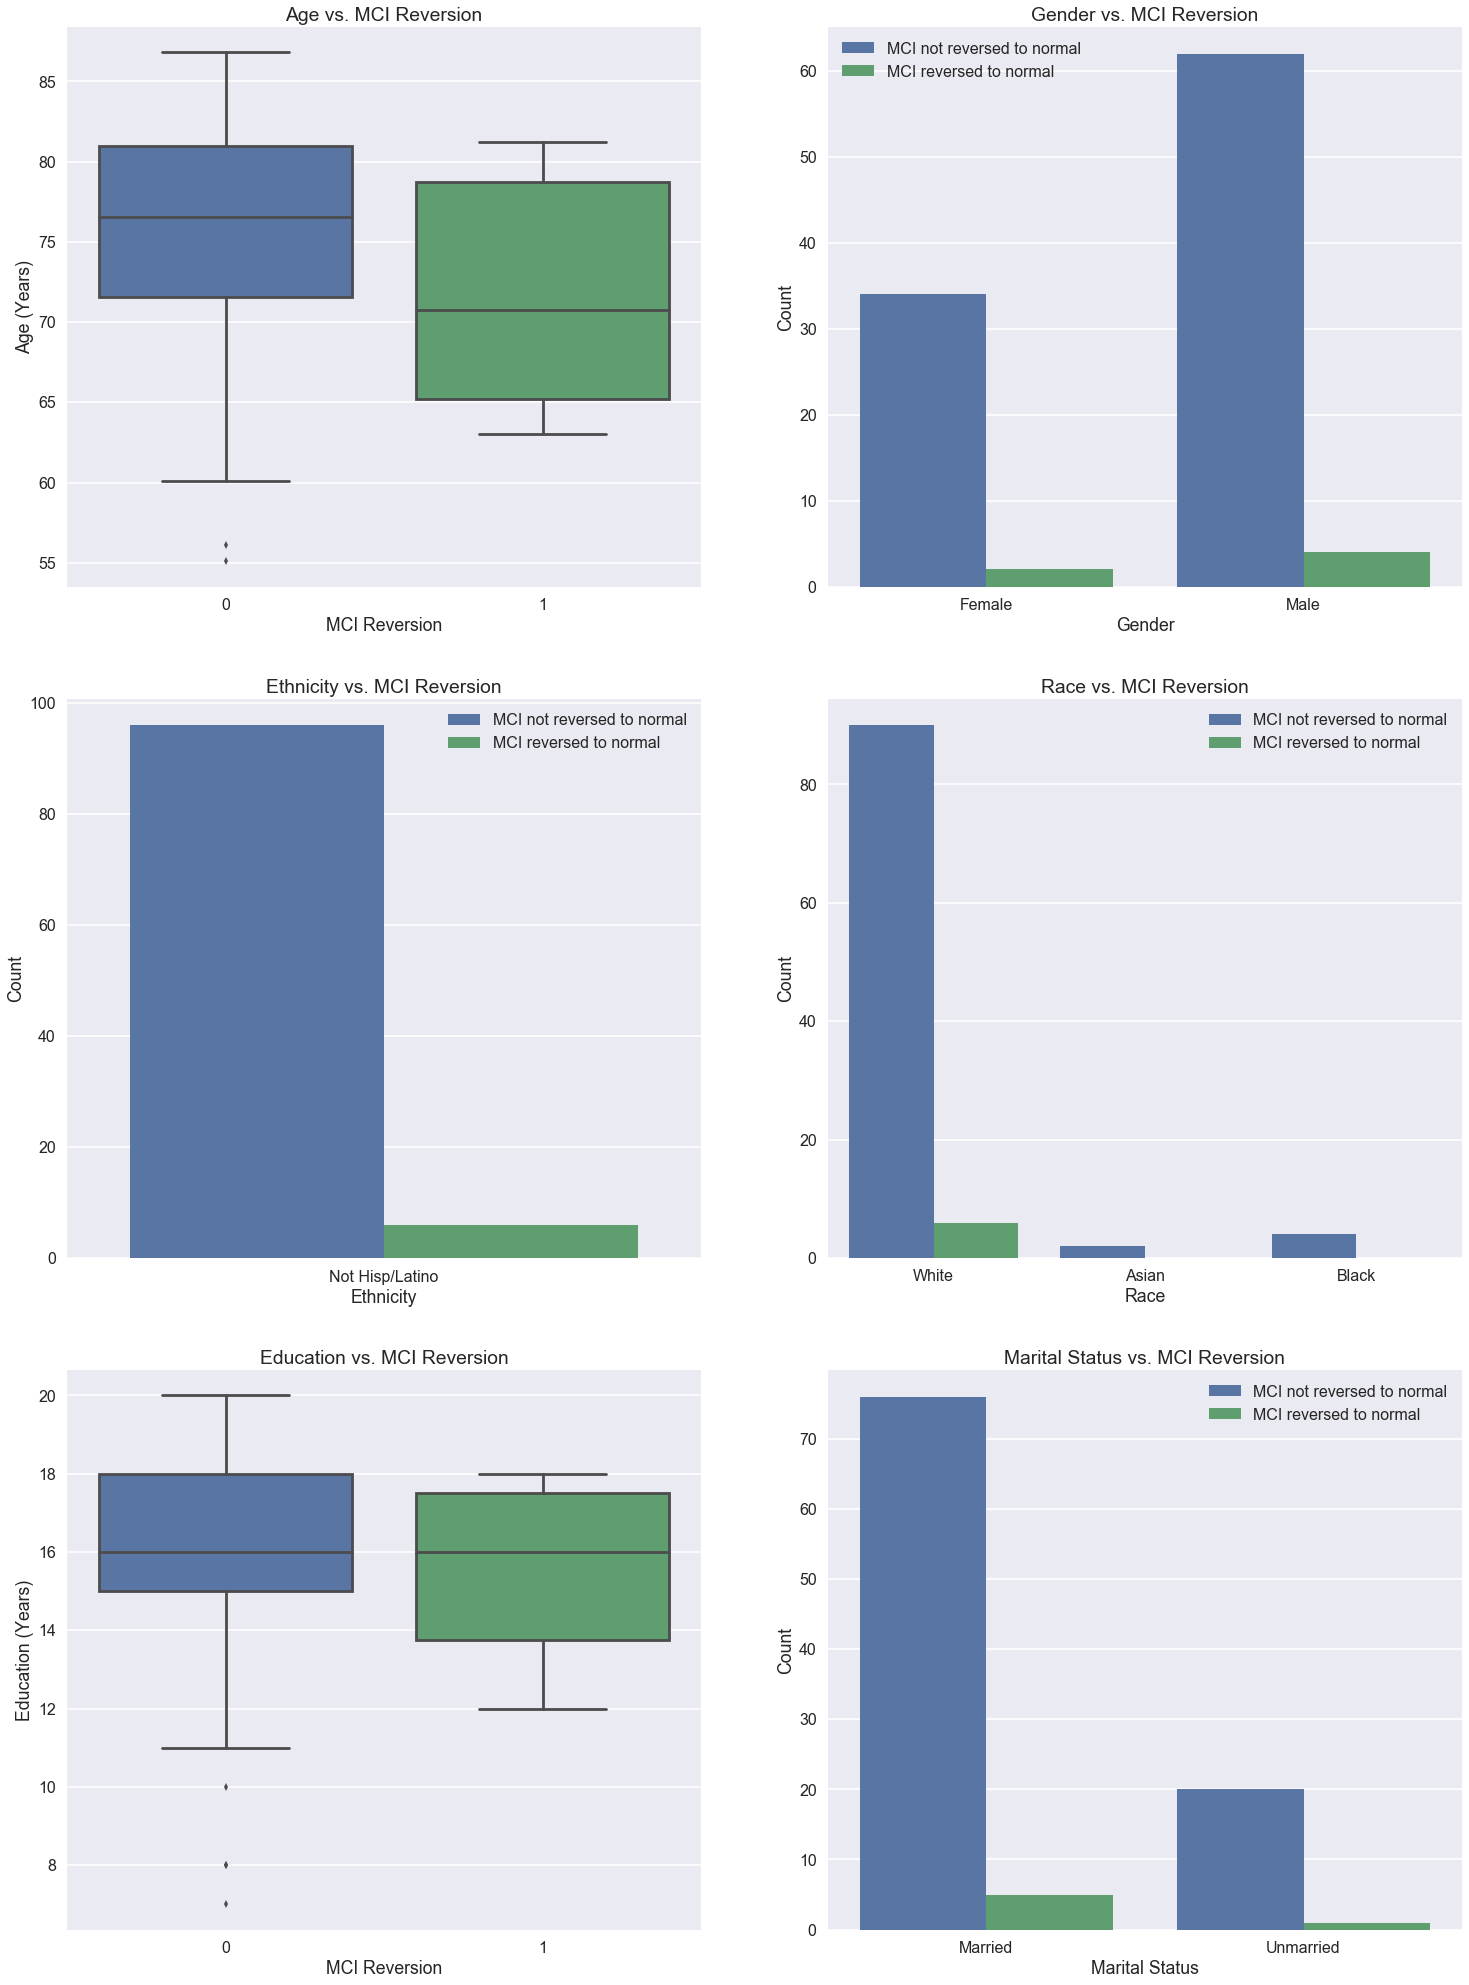

In [5]:
plt.figure(figsize=(25,35))

# Age vs. MCI Reversion
plt.subplot(3,2,1)
data_age = data_train[['AGE','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='AGE', data=data_age)
plt.title('Age vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('Age (Years)')

# Gender vs. MCI Reversion
plt.subplot(3,2,2)
data_gender = data_train[['PTGENDER','MCI_reversion_2y']]
sns.countplot(x='PTGENDER', hue='MCI_reversion_2y', data=data_gender)
plt.title('Gender vs. MCI Reversion')
plt.xlabel('Gender')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'])
    
# Ethnicity vs. MCI Reversion
plt.subplot(3,2,3)
data_eth = data_train[['PTETHCAT','MCI_reversion_2y']]
sns.countplot(x='PTETHCAT', hue='MCI_reversion_2y', data=data_eth)
plt.title('Ethnicity vs. MCI Reversion')
plt.xlabel('Ethnicity')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'], loc='upper right')

# Race vs. MCI Reversion
plt.subplot(3,2,4)
data_race = data_train[['PTRACCAT','MCI_reversion_2y']]
sns.countplot(x='PTRACCAT', hue='MCI_reversion_2y', data=data_race)
plt.title('Race vs. MCI Reversion')
plt.xlabel('Race')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'], loc='upper right')
    
# Education
plt.subplot(3,2,5)
data_edu = data_train[['PTEDUCAT','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='PTEDUCAT', data=data_edu)
plt.title('Education vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('Education (Years)')

# Marital Status vs. MCI Reversion
plt.subplot(3,2,6)
data_mar = data_train[['PTMARRY','MCI_reversion_2y']]
sns.countplot(x='PTMARRY', hue="MCI_reversion_2y", data=data_mar)
plt.title('Marital Status vs. MCI Reversion')
plt.xlabel('Marital Status')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'], loc='upper right');

- #### Interpretation
    - **Age:** Based on the boxplot, young people are more likely to reverse from MCI. Therefore, we select age as our potential predictor.
    - **Gender:** ~60% subjects in the training set is male and ~40% is female. The number of cases in training set is small, but it appears that the probability of MCI reversing to normal is lower among males as compared to females. Therefore, we select gender as our potential predictor.
    - **Ethnicity:** The majority of people in our dataset is 'Non-Hispanic/Latino'. There is no Hispanic/Latino individuals in our training set. We do not have sufficient power to observe the pattern of MCI reversion across different ethnicity groups.
    - **Race:** Again, the majority of people in our training set is 'White'. We do not have sufficient power to observe the pattern of MCI reversion across different race groups.
    - **Education:** There is no apparent relationship between baseline Education and MCI reversion.
    - **Marital Status:** Based on the countplot, married people seem to be more likely to reverse from MCI. We select Martial Status as our potential predictor.

- #### Variable Selection
    - We select **Age**, **Gender**, and **Marital Status** as potential predictors.

### b. Clinical Factors

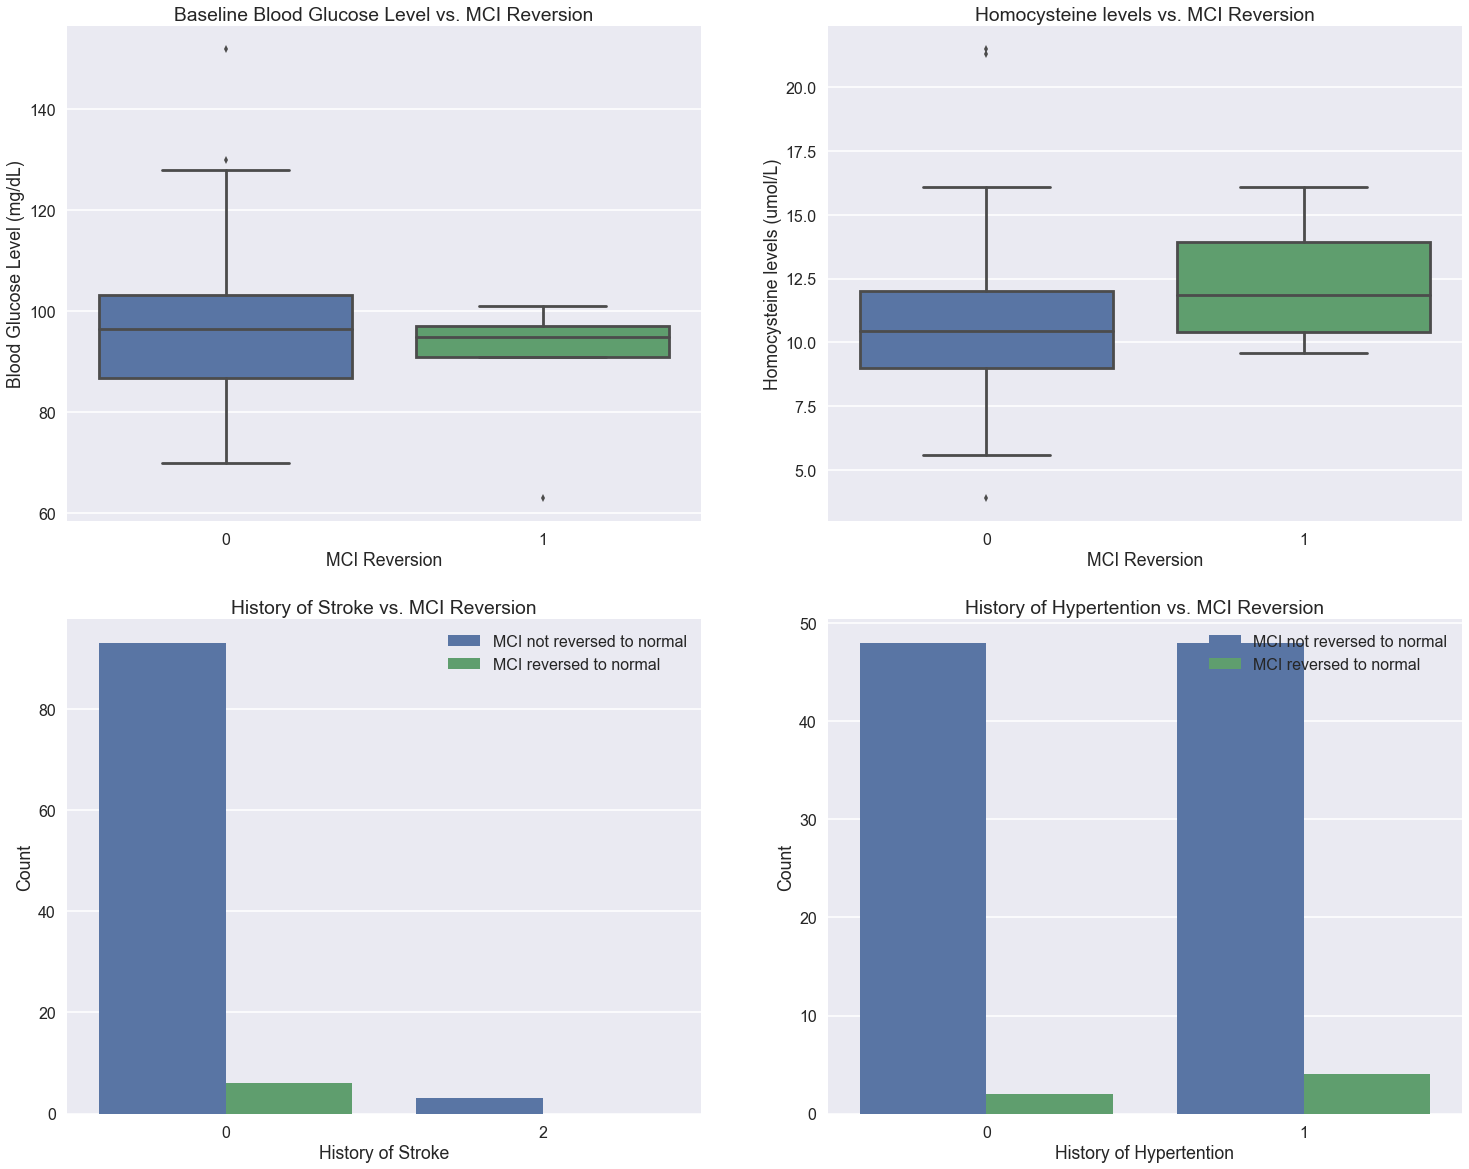

In [6]:
plt.figure(figsize=(25,20))

# Baseline blood glucose level vs. MCI reversion
plt.subplot(2,2,1)
data_glu = data_train[['PMBLGLUC','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='PMBLGLUC', data=data_glu)
plt.title('Baseline Blood Glucose Level vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('Blood Glucose Level (mg/dL)')

# Homocysteine level vs. MCI reversion
plt.subplot(2,2,2)
data_hom = data_train[['HCAMPLAS','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='HCAMPLAS', data=data_hom)
plt.title('Homocysteine levels vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('Homocysteine levels (umol/L)')
    
# History of Stroke vs. MCI reversion
plt.subplot(2,2,3)
data_dia = data_train[['HMSTROKE','MCI_reversion_2y']]
sns.countplot(x="HMSTROKE", hue="MCI_reversion_2y", data=data_dia)
plt.title('History of Stroke vs. MCI Reversion')
plt.xlabel('History of Stroke')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'], loc='upper right')

# History of Hypertention vs. MCI reversion
plt.subplot(2,2,4)
data_dia = data_train[['HMHYPERT','MCI_reversion_2y']]
sns.countplot(x="HMHYPERT", hue="MCI_reversion_2y", data=data_dia)
plt.title('History of Hypertention vs. MCI Reversion')
plt.xlabel('History of Hypertention')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'], loc='upper right');

- #### Interpretation
    - **Baseline blood glucose level:** There is no clear association between Baseline blood glucose level and MCI reversion.
    - **Homocysteine level:** Based on the boxplot, people with higher Homocysteine level are more likely to reverse from MCI. We select Homocysteine level as our potential predictor.
    - **History of Stroke:** There is only a few cases in the training set. We do not have sufficient power to observe the pattern of MCI reversion across different histories of Stroke.
    - **History of Hypertention:** There is no clear association between History of Hypertention and MCI reversion.

- #### Variable Selection
    - We select **Homocysteine level** as potential predictor.

### c. Lifestyle factors

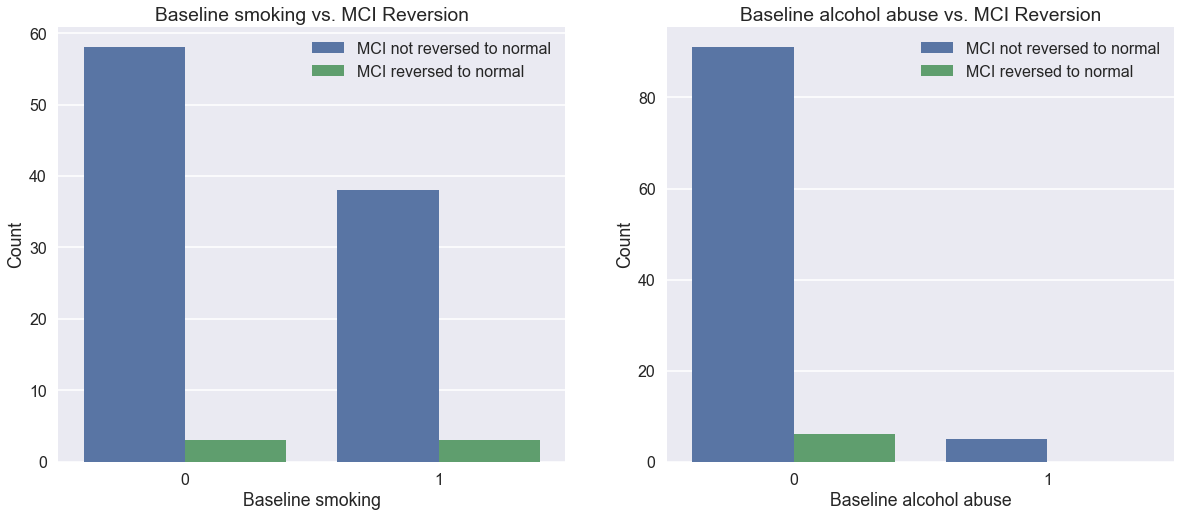

In [7]:
plt.figure(figsize=(20,8))

# Baseline smoking vs. MCI reversion
plt.subplot(121)
data_smo = data_train[['MH16SMOK','MCI_reversion_2y']]
sns.countplot(x='MH16SMOK', hue="MCI_reversion_2y",data=data_smo)
plt.title('Baseline smoking vs. MCI Reversion')
plt.xlabel('Baseline smoking')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'])

# Baseline alcohol abuse vs. MCI reversion
plt.subplot(122)
data_alc = data_train[['MH14ALCH','MCI_reversion_2y']]
sns.countplot(x='MH14ALCH', hue="MCI_reversion_2y",data=data_alc)
plt.title('Baseline alcohol abuse vs. MCI Reversion')
plt.xlabel('Baseline alcohol abuse')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'], loc='upper right');

- #### Interpretation
    - **Baseline smoking:** Based on the countplot, people who smoke are more likely to reverse from MCI. We select Baseline smoking as potential predictor.
    - **Baseline alcohol abuse:** There is only a few cases in the training set. We do not have sufficient power to observe the pattern of MCI reversion across different alcohol abuse status.

- #### Variable Selection
    - We select **Baseline smoking** as potential predictor. 

### d. Neurocognitive/neuropsychological assessments

#### Histogram

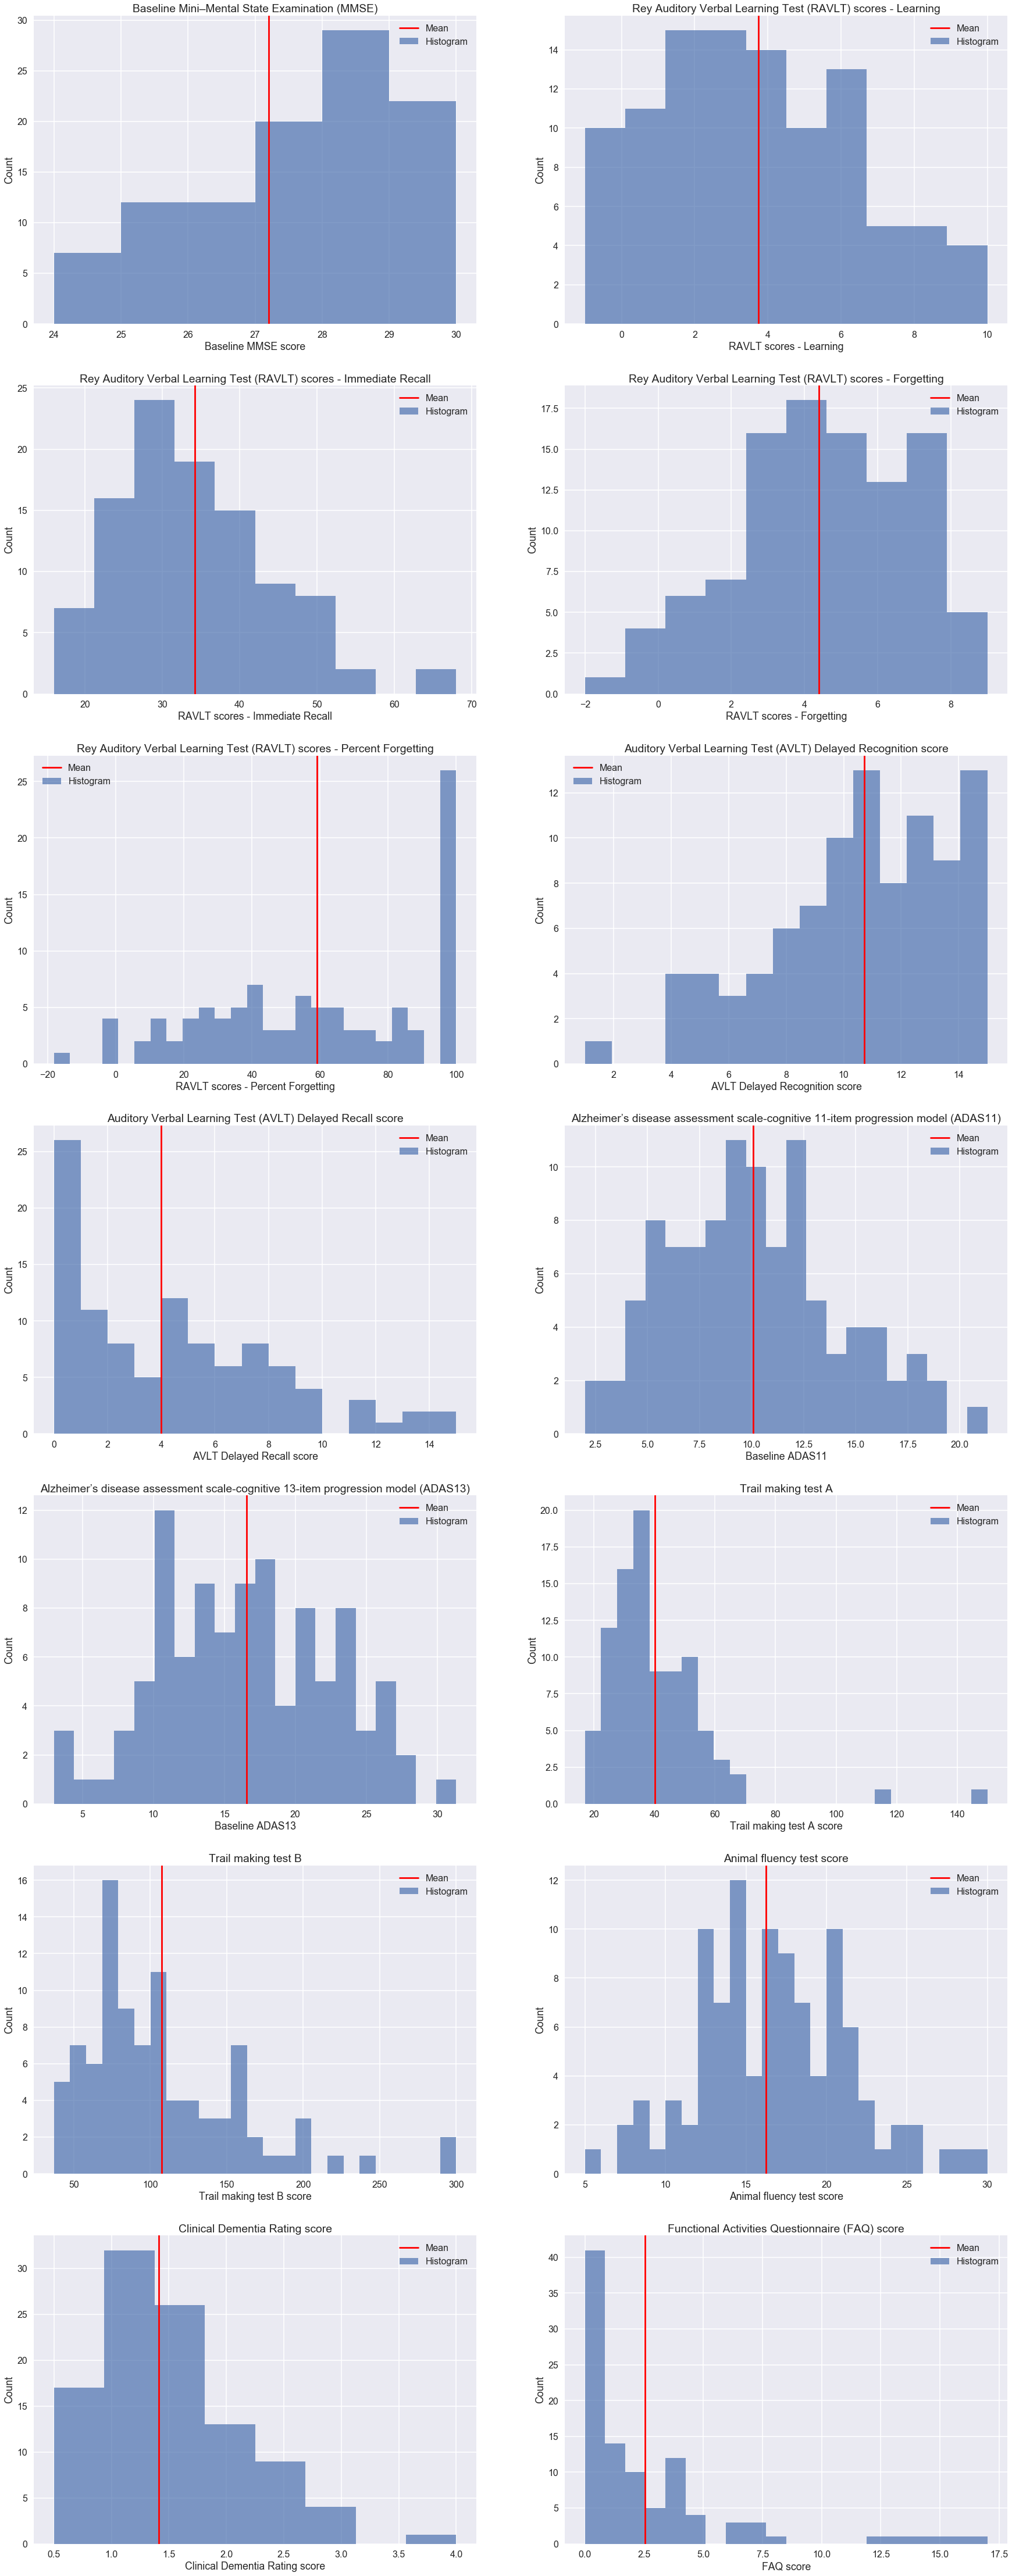

In [8]:
plt.figure(figsize=(30,80))

# Baseline Mini–Mental State Examination
plt.subplot(7,2,1)
plt.hist(x='MMSE', data=data_train,alpha=0.7,bins=6,label='Histogram');
plt.title('Baseline Mini–Mental State Examination (MMSE)')
plt.xlabel('Baseline MMSE score')
plt.ylabel('Count')
plt.axvline(data_train['MMSE'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()

# Rey Auditory Verbal Learning Test (RAVLT) scores - Learning
plt.subplot(7,2,2)
plt.hist(x='RAVLT_learning', data=data_train,alpha=0.7,bins=10,label='Histogram');
plt.title('Rey Auditory Verbal Learning Test (RAVLT) scores - Learning')
plt.xlabel('RAVLT scores - Learning')
plt.ylabel('Count')
plt.axvline(data_train['RAVLT_learning'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()
    
# Rey Auditory Verbal Learning Test (RAVLT) scores - Immediate Recall
plt.subplot(7,2,3)
plt.hist(x='RAVLT_immediate', data=data_train,alpha=0.7,bins=10,label='Histogram');
plt.title('Rey Auditory Verbal Learning Test (RAVLT) scores - Immediate Recall')
plt.xlabel('RAVLT scores - Immediate Recall')
plt.ylabel('Count')
plt.axvline(data_train['RAVLT_immediate'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()

# Rey Auditory Verbal Learning Test (RAVLT) scores - Forgetting
plt.subplot(7,2,4)
plt.hist(x='RAVLT_forgetting', data=data_train,alpha=0.7,bins=10,label='Histogram');
plt.title('Rey Auditory Verbal Learning Test (RAVLT) scores - Forgetting')
plt.xlabel('RAVLT scores - Forgetting')
plt.ylabel('Count')
plt.axvline(data_train['RAVLT_forgetting'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()

# Rey Auditory Verbal Learning Test (RAVLT) scores - Percent Forgetting
plt.subplot(7,2,5)
plt.hist(x='RAVLT_perc_forgetting', data=data_train,alpha=0.7,bins=25,label='Histogram');
plt.title('Rey Auditory Verbal Learning Test (RAVLT) scores - Percent Forgetting')
plt.xlabel('RAVLT scores - Percent Forgetting')
plt.ylabel('Count')
plt.axvline(data_train['RAVLT_perc_forgetting'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()

# Auditory Verbal Learning Test (AVLT) Delayed Recognition score
plt.subplot(7,2,6)
plt.hist(x=data_train['AVLT_Delay_Rec'].dropna(),alpha=0.7,bins=15,label='Histogram');
plt.title('Auditory Verbal Learning Test (AVLT) Delayed Recognition score')
plt.xlabel('AVLT Delayed Recognition score')
plt.ylabel('Count')
plt.axvline(data_train['AVLT_Delay_Rec'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()
    
# Auditory Verbal Learning Test (AVLT) Delayed Recall score
plt.subplot(7,2,7)
plt.hist(x=data_train['AVDEL30MIN'].dropna(),alpha=0.7,bins=15,label='Histogram');
plt.title('Auditory Verbal Learning Test (AVLT) Delayed Recall score')
plt.xlabel('AVLT Delayed Recall score')
plt.ylabel('Count')
plt.axvline(data_train['AVDEL30MIN'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()
    
# Alzheimer’s disease assessment scale-cognitive 11-item progression model
plt.subplot(7,2,8)
plt.hist(x=data_train['ADAS11'].dropna(),alpha=0.7,bins=20,label='Histogram');
plt.title('Alzheimer’s disease assessment scale-cognitive 11-item progression model (ADAS11)')
plt.xlabel('Baseline ADAS11')
plt.ylabel('Count')
plt.axvline(data_train['ADAS11'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()
    
# Alzheimer’s disease assessment scale-cognitive 13-item progression model
plt.subplot(7,2,9)
plt.hist(x=data_train['ADAS13'].dropna(),alpha=0.7,bins=20,label='Histogram');
plt.title('Alzheimer’s disease assessment scale-cognitive 13-item progression model (ADAS13)')
plt.xlabel('Baseline ADAS13')
plt.ylabel('Count')
plt.axvline(data_train['ADAS13'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()

# Trail making test A score
plt.subplot(7,2,10)
plt.hist(x=data_train['TMT_PtA_Complete'].dropna(),alpha=0.7,bins=25,label='Histogram');
plt.title('Trail making test A')
plt.xlabel('Trail making test A score')
plt.ylabel('Count')
plt.axvline(data_train['TMT_PtA_Complete'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()

# Trail making test B score
plt.subplot(7,2,11)
plt.hist(x=data_train['TMT_PtB_Complete'].dropna(),alpha=0.7,bins=25,label='Histogram');
plt.title('Trail making test B')
plt.xlabel('Trail making test B score')
plt.ylabel('Count')
plt.axvline(data_train['TMT_PtB_Complete'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()
    
# Animal Fluency
plt.subplot(7,2,12)
plt.hist(x=data_train['CATANIMSC'].dropna(),alpha=0.7,bins=25,label='Histogram');
plt.title('Animal fluency test score')
plt.xlabel('Animal fluency test score')
plt.ylabel('Count')
plt.axvline(data_train['CATANIMSC'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()

# Clinical Dementia Rating score
plt.subplot(7,2,13)
plt.hist(x=data_train['CDRSB'].dropna(),alpha=0.7,bins=8,label='Histogram');
plt.title('Clinical Dementia Rating score')
plt.xlabel('Clinical Dementia Rating score')
plt.ylabel('Count')
plt.axvline(data_train['CDRSB'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()

# Functional Activities Questionnaire
plt.subplot(7,2,14)
plt.hist(x=data_train['FAQ'].dropna(),alpha=0.7,bins=20,label='Histogram');
plt.title('Functional Activities Questionnaire (FAQ) score')
plt.xlabel('FAQ score')
plt.ylabel('Count')
plt.axvline(data_train['FAQ'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend();

- #### Interpretation
<br/>The majority of the neuropsychological measures appear to have skewed distributions. We may need to normalize or transform these values in the final analyses.

#### Correlation matrix

In [9]:
# Correlations between neuropsychological measures
data_neuro = data_train[['CDRSB','ADAS11','ADAS13','MMSE','RAVLT_immediate','RAVLT_learning','RAVLT_forgetting',
                         'RAVLT_perc_forgetting','AVDEL30MIN','AVLT_Delay_Rec','FAQ','TMT_PtA_Complete','TMT_PtB_Complete',
                         'CATANIMSC']].dropna()

corr = pd.DataFrame(np.corrcoef(data_neuro.T))
corr.columns = ['CDRSB','ADAS11','ADAS13','MMSE','RAVLT_immediate','RAVLT_learning','RAVLT_forgetting',
                         'RAVLT_perc_forgetting','AVDEL30MIN','AVLT_Delay_Rec','FAQ','TMT_PtA_Complete','TMT_PtB_Complete',
                         'CATANIMSC']

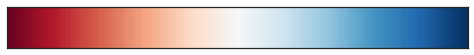

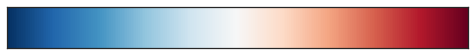

In [10]:
dpal = sns.choose_colorbrewer_palette(data_type='diverging', as_cmap=True)

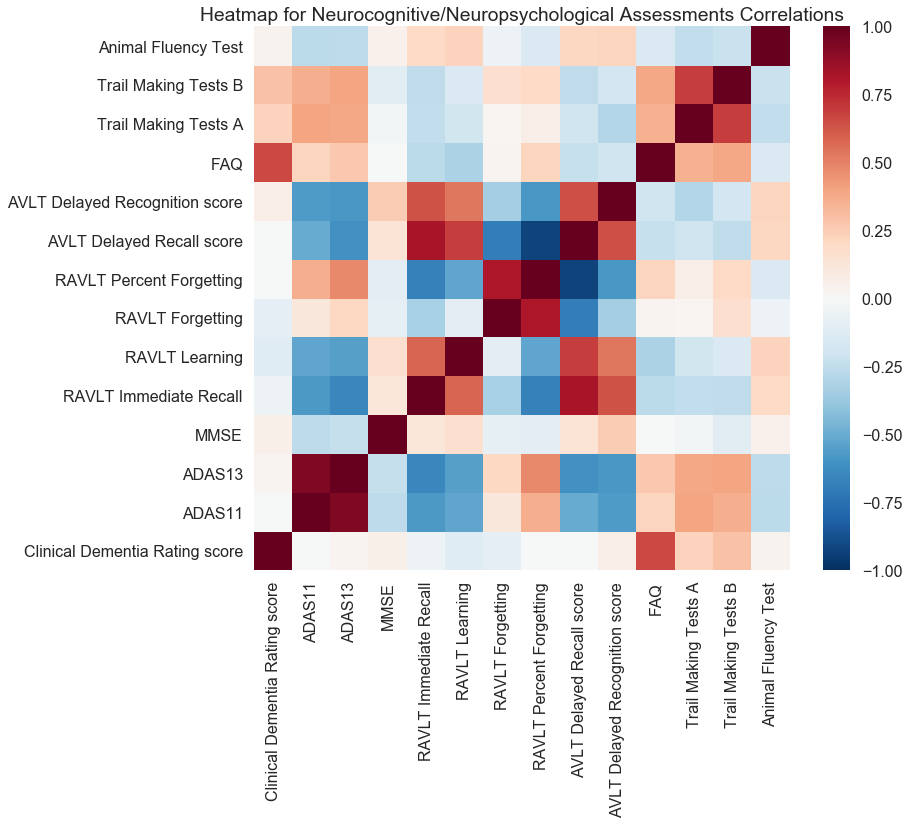

In [11]:
plt.figure(figsize=(12,10))
plt.pcolor(corr, cmap=dpal, vmin=-1, vmax=1)
labels = ['Clinical Dementia Rating score', 'ADAS11', 'ADAS13', 'MMSE', 'RAVLT Immediate Recall', 'RAVLT Learning', 
          'RAVLT Forgetting', 'RAVLT Percent Forgetting', 'AVLT Delayed Recall score', 'AVLT Delayed Recognition score',
          'FAQ', 'Trail Making Tests A', 'Trail Making Tests B', 'Animal Fluency Test']
plt.xticks(np.arange(data_neuro.shape[1])+0.5, labels, rotation='vertical')
plt.yticks(np.arange(data_neuro.shape[1])+0.5, labels,rotation='horizontal')
plt.title('Heatmap for Neurocognitive/Neuropsychological Assessments Correlations')
plt.colorbar();

#### Scatter plot matrix

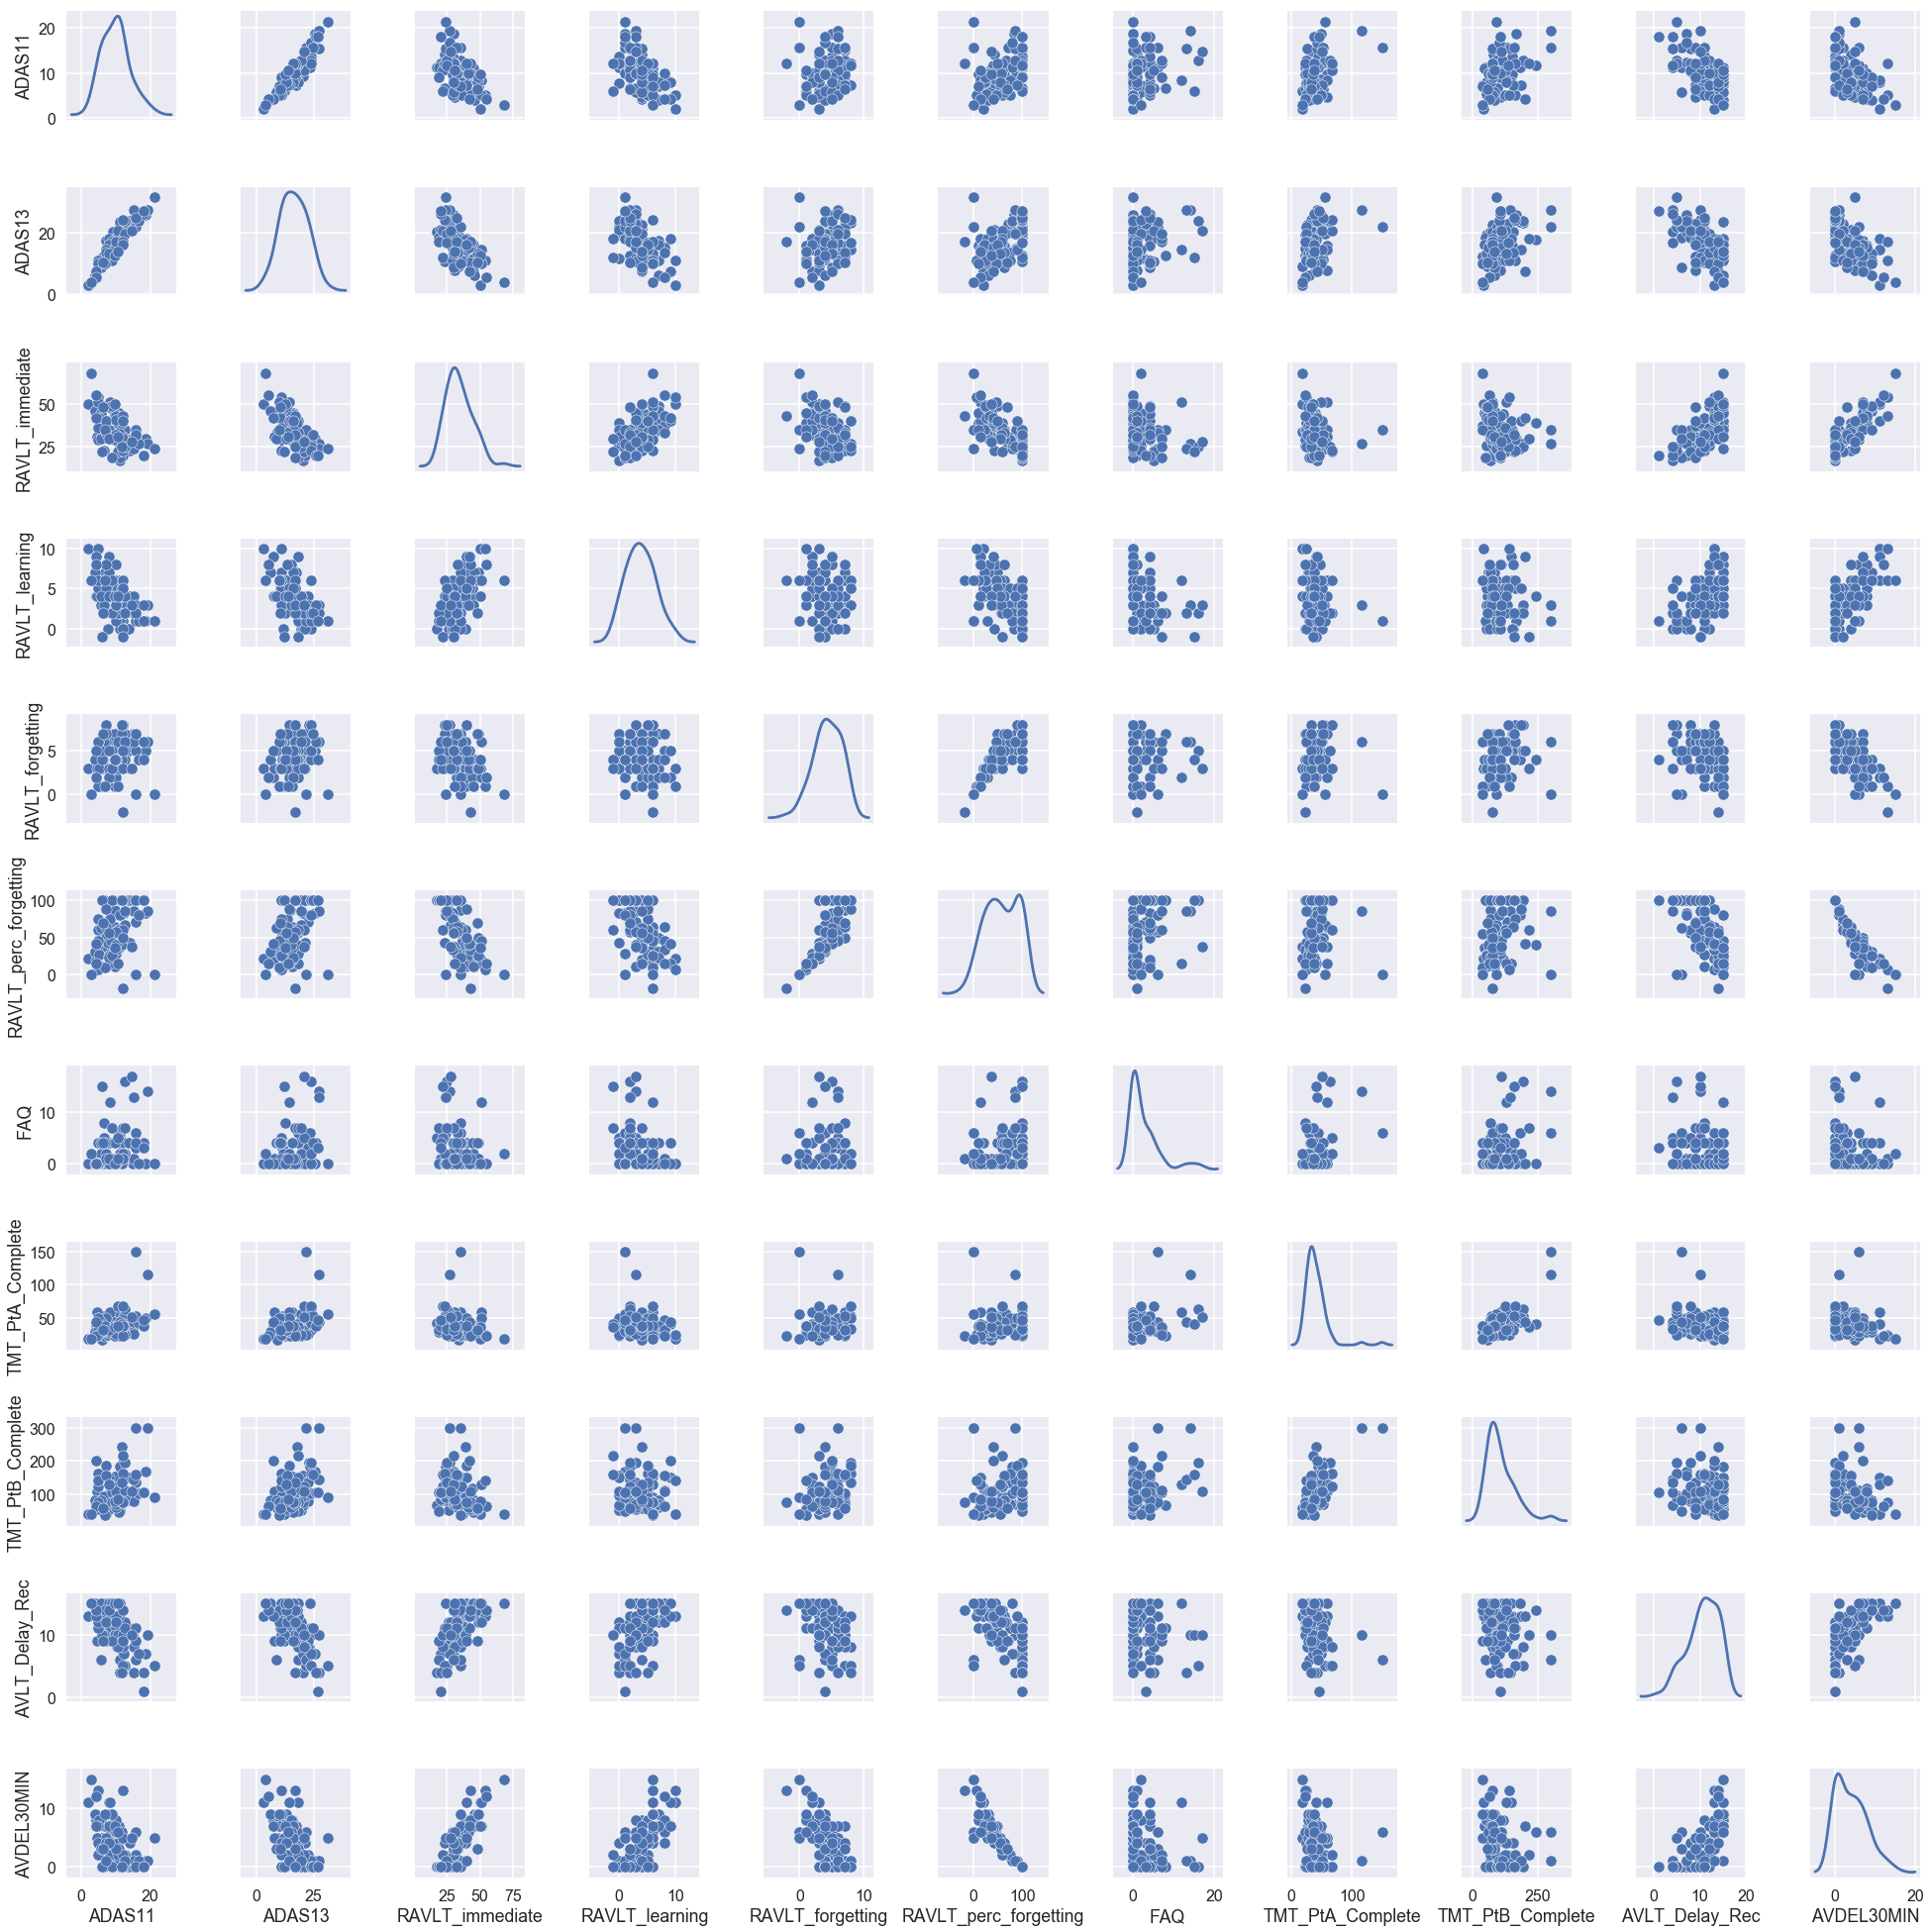

In [12]:
sns.pairplot(data_neuro[['ADAS11','ADAS13','RAVLT_immediate','RAVLT_learning','RAVLT_forgetting',
                         'RAVLT_perc_forgetting','FAQ','TMT_PtA_Complete','TMT_PtB_Complete','AVLT_Delay_Rec',
                         'AVDEL30MIN']], diag_kind='kde');

- #### Interpretation
<br/>Neuropsychological measures in the same domain (e.g. Trail making Tests are in the attention/executive functioning domain; AVLT measures are in the memory domain), tend to be positively correlated. Correlations tend to be weaker and often in opposite directions for inter-domain comparisons.

#### Box plots and count plots

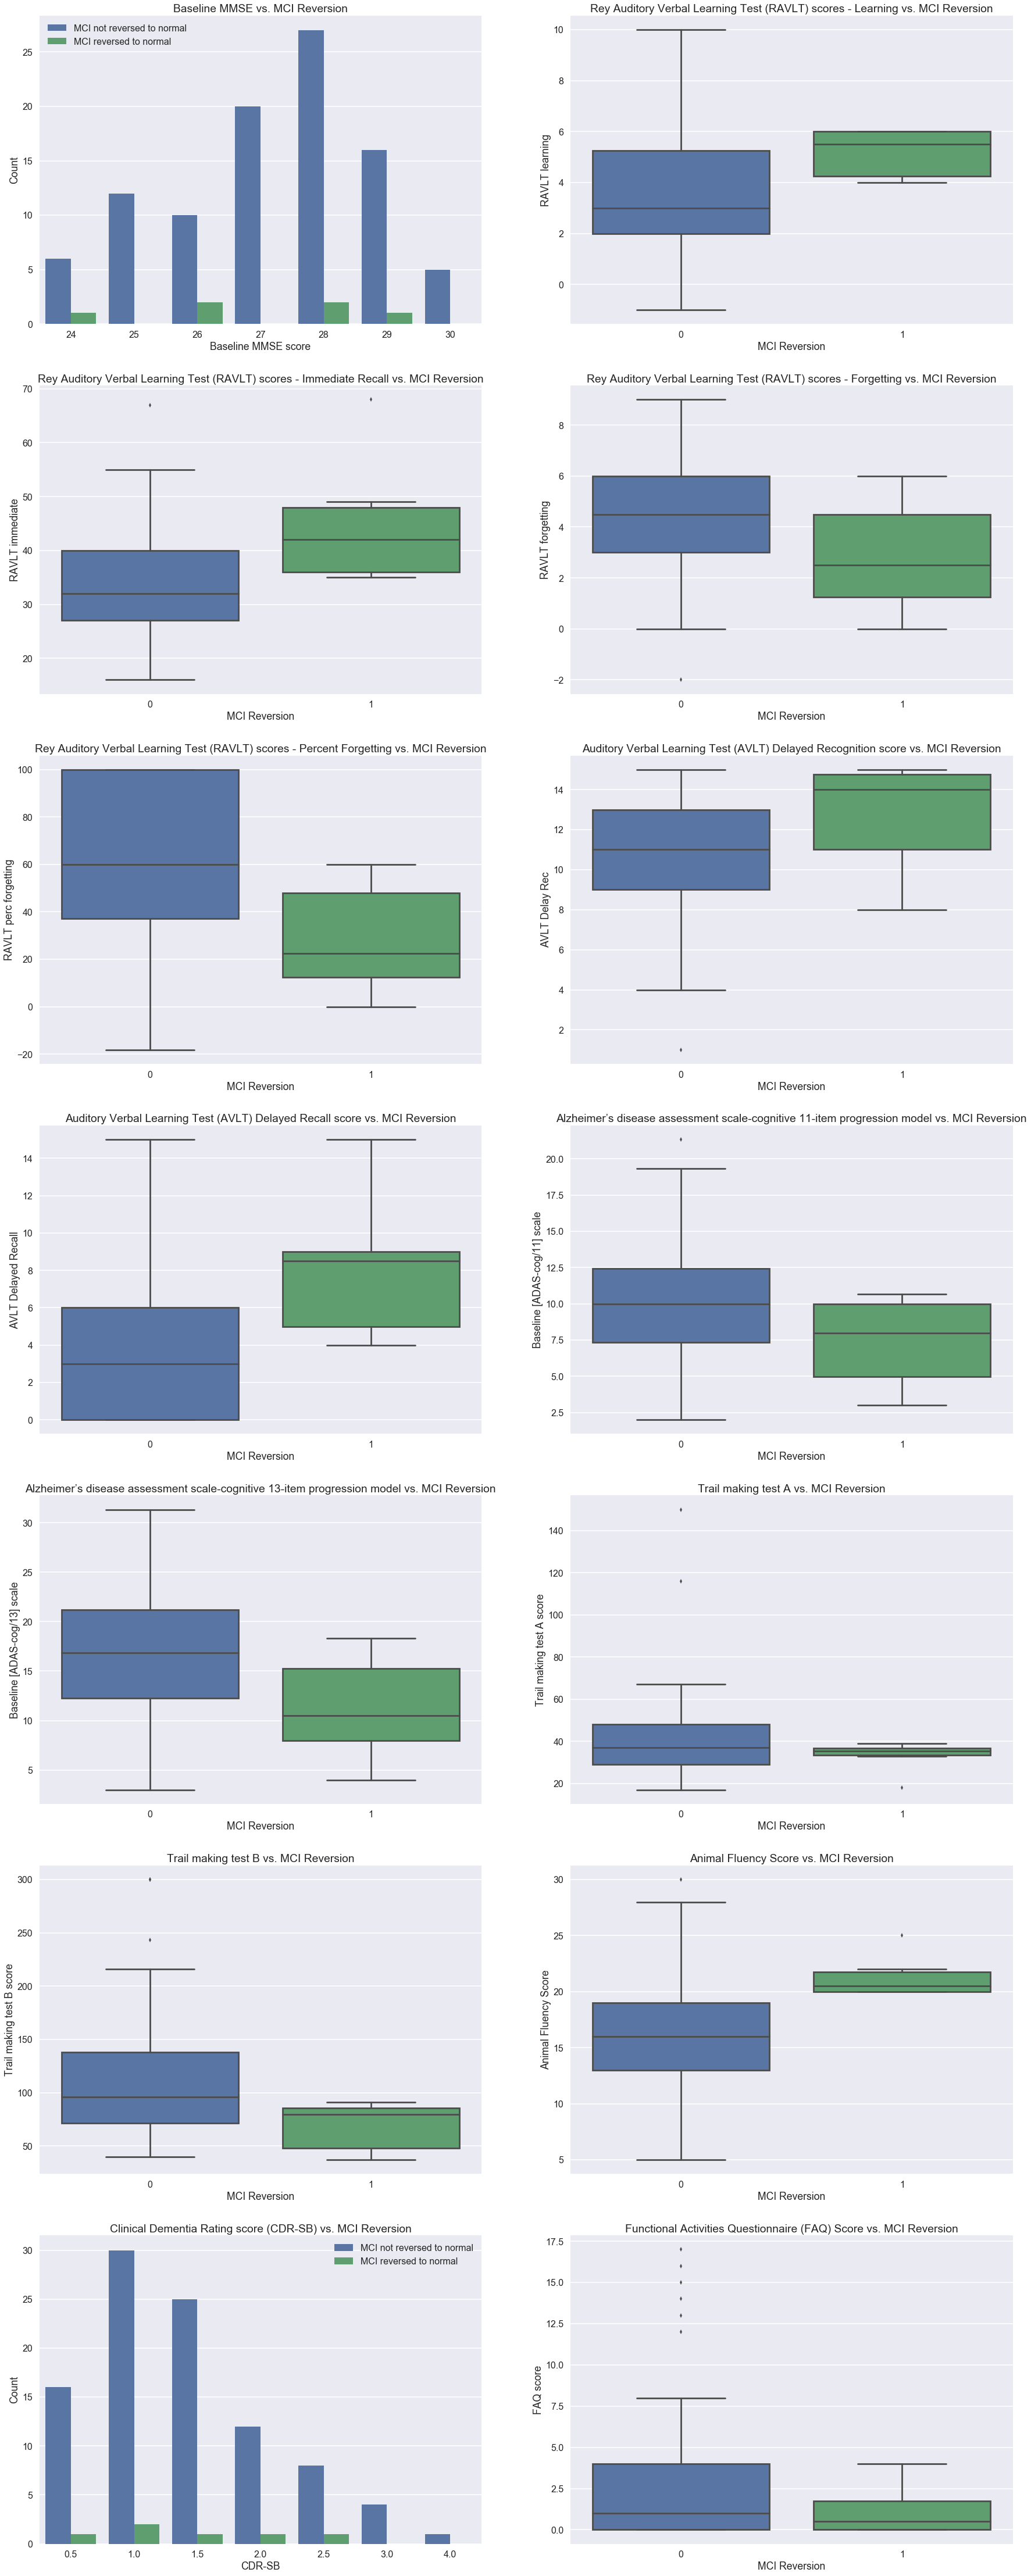

In [13]:
plt.figure(figsize=(30,80))

# Baseline Mini–Mental State Examination
plt.subplot(7,2,1)
data_mmse = data_train[['MMSE','MCI_reversion_2y']]
sns.countplot(x='MMSE', hue='MCI_reversion_2y', data=data_mmse)
plt.title('Baseline MMSE vs. MCI Reversion')
plt.xlabel('Baseline MMSE score')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'], loc='upper left')
    
# Rey Auditory Verbal Learning Test (RAVLT) scores - Learning
plt.subplot(7,2,2)
data_RAVLT_learning = data_train[['RAVLT_learning','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='RAVLT_learning', data=data_RAVLT_learning)
plt.title('Rey Auditory Verbal Learning Test (RAVLT) scores - Learning vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('RAVLT learning')
    
# Rey Auditory Verbal Learning Test (RAVLT) scores - Immediate Recall
plt.subplot(7,2,3)
data_RAVLT_immediate = data_train[['RAVLT_immediate','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='RAVLT_immediate', data=data_RAVLT_immediate)
plt.title('Rey Auditory Verbal Learning Test (RAVLT) scores - Immediate Recall vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('RAVLT immediate')

# Rey Auditory Verbal Learning Test (RAVLT) scores - Forgetting
plt.subplot(7,2,4)
data_RAVLT_forgetting = data_train[['RAVLT_forgetting','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='RAVLT_forgetting', data=data_RAVLT_forgetting)
plt.title('Rey Auditory Verbal Learning Test (RAVLT) scores - Forgetting vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('RAVLT forgetting')
    
# Rey Auditory Verbal Learning Test (RAVLT) scores - Percent Forgetting
plt.subplot(7,2,5)
data_RAVLT_perc_forgetting = data_train[['RAVLT_perc_forgetting','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='RAVLT_perc_forgetting', data=data_RAVLT_perc_forgetting)
plt.title('Rey Auditory Verbal Learning Test (RAVLT) scores - Percent Forgetting vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('RAVLT perc forgetting')

# Auditory Verbal Learning Test (AVLT) Delayed Recognition score
plt.subplot(7,2,6)
data_AVLT_Delay_Rec = data_train[['AVLT_Delay_Rec','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='AVLT_Delay_Rec', data=data_AVLT_Delay_Rec)
plt.title('Auditory Verbal Learning Test (AVLT) Delayed Recognition score vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('AVLT Delay Rec')

# Auditory Verbal Learning Test (AVLT) Delayed Recall score
plt.subplot(7,2,7)
data_AVDEL30MIN = data_train[['AVDEL30MIN','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='AVDEL30MIN', data=data_AVDEL30MIN)
plt.title('Auditory Verbal Learning Test (AVLT) Delayed Recall score vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('AVLT Delayed Recall') 

# Alzheimer’s disease assessment scale-cognitive 11-item progression model
plt.subplot(7,2,8)
data_ADAS11 = data_train[['ADAS11','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='ADAS11', data=data_ADAS11)
plt.title('Alzheimer’s disease assessment scale-cognitive 11-item progression model vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('Baseline [ADAS-cog/11] scale')
    
# Alzheimer’s disease assessment scale-cognitive 13-item progression model
plt.subplot(7,2,9)
data_ADAS13 = data_train[['ADAS13','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='ADAS13', data=data_ADAS13)
plt.title('Alzheimer’s disease assessment scale-cognitive 13-item progression model vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('Baseline [ADAS-cog/13] scale')
    
# Trail making test A
plt.subplot(7,2,10)
data_TMT_PtA_Complete = data_train[['TMT_PtA_Complete','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='TMT_PtA_Complete', data=data_TMT_PtA_Complete)
plt.title('Trail making test A vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('Trail making test A score')
    
# Trail making test B
plt.subplot(7,2,11)
data_TMT_PtB_Complete = data_train[['TMT_PtB_Complete','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='TMT_PtB_Complete', data=data_TMT_PtB_Complete)
plt.title('Trail making test B vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('Trail making test B score')
    
# Animal Fluency
plt.subplot(7,2,12)
data_CATANIMSC = data_train[['CATANIMSC','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='CATANIMSC', data=data_CATANIMSC)
plt.title('Animal Fluency Score vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('Animal Fluency Score')

# Clinical Dementia Rating score
plt.subplot(7,2,13)
data_CDRSB = data_train[['CDRSB','MCI_reversion_2y']]
sns.countplot(x='CDRSB', hue='MCI_reversion_2y', data=data_CDRSB)
plt.title('Clinical Dementia Rating score (CDR-SB) vs. MCI Reversion')
plt.xlabel('CDR-SB')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'], loc='upper right')

# Functional Activities Questionnaire
plt.subplot(7,2,14)
data_FAQ = data_train[['FAQ','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='FAQ', data=data_FAQ)
plt.title('Functional Activities Questionnaire (FAQ) Score vs. MCI Reversion')
plt.xlabel('MCI Reversion')
plt.ylabel('FAQ score');

- #### Interpretation
    - **MMSE:** There is no apparent association between baseline MMSE score and MCI reversion. 
    - **Auditory Verbal Learning Test (AVLT) scores:** All the AVLT scores seem to be associated with MCI reversion. RAVLT_forgetting, RAVLT_perc_forgetting, and AVDEL30MIN are strongly correlated. We select RAVLT_immediate, RAVLT_learning, and RAVLT_forgetting as our potential predictors. Lower scores for AVLT suggests poorer memory abilities.
    - **ADAS11 and ADAS13:** These two predictors are strongly correlated and both seem to be associated with MCI reversion (negative correlation). We select ADAS13 as our potential predictor.
    - **Trail making test A and Trail making test B:** These two variables are strongly correlated and both seem to assoicated with MCI reversion. We select Trail making test B as our potential predictor. Higher scores for the trail making tests (TNT A and B), indicate poorer attention/executive function.
    - **Animal Fluency:** Based on the boxplot, people with high Animal Fluency Score are more likely to reverse from MCI. We select Animal Fluency Score as our potential predictor. Lower scores for Animal Fluency represent poorer language skills.
    - **Clinical Dementia Rating score (CDR-SB):** There is no apparent trend between CDR-SB and MCI reversion. Higher CDR-SB scores indicates poorer cogntive/functional performance.
    - **Functional Activities Questionnaire (FAQ) Score:** There is no apparent association between FAQ score and MCI reversion.

- #### Variable Selection
    - We select **RAVLT_immediate**, **RAVLT_learning**, **RAVLT_forgetting**, **ADAS13**, **TMT_PtB_Complete**, and **Animal Fluency Score** as potential predictors.

### e. Neuroimaging Biomarkers

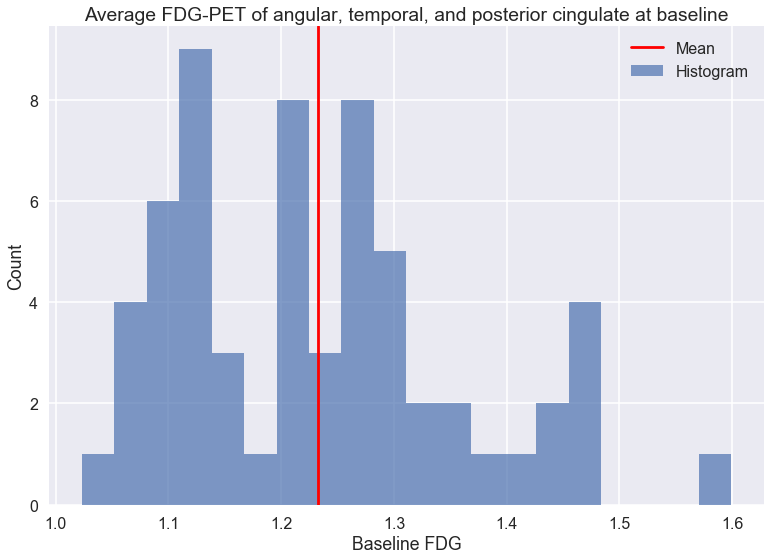

In [14]:
plt.hist(x=data_train['FDG'].dropna(),alpha=0.7,bins=20,label='Histogram');
plt.title('Average FDG-PET of angular, temporal, and posterior cingulate at baseline')
plt.xlabel('Baseline FDG')
plt.ylabel('Count')
plt.axvline(data_train['FDG'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend();

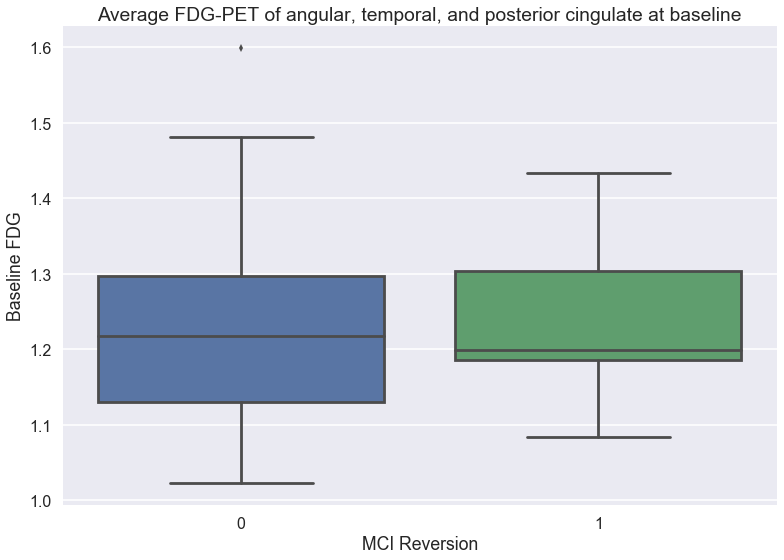

In [15]:
data_fdg = data_train[['FDG','MCI_reversion_2y']]
sns.boxplot(x='MCI_reversion_2y', y='FDG', data=data_fdg)
plt.title('Average FDG-PET of angular, temporal, and posterior cingulate at baseline')
plt.xlabel('MCI Reversion')
plt.ylabel('Baseline FDG');

- #### Interpretation
<br/>Based on the boxplot, there is no apparent association between baseline fluorodeoxyglucose 18F
uptake on brain positron emission tomography (FDG-PET) and MCI reversion.

- #### Variable Selection
    - We don't select any Neuroimaging Biomarkers.

### f. Cerebrospinal fluid (CSF) Biomarkers

#### Histogram

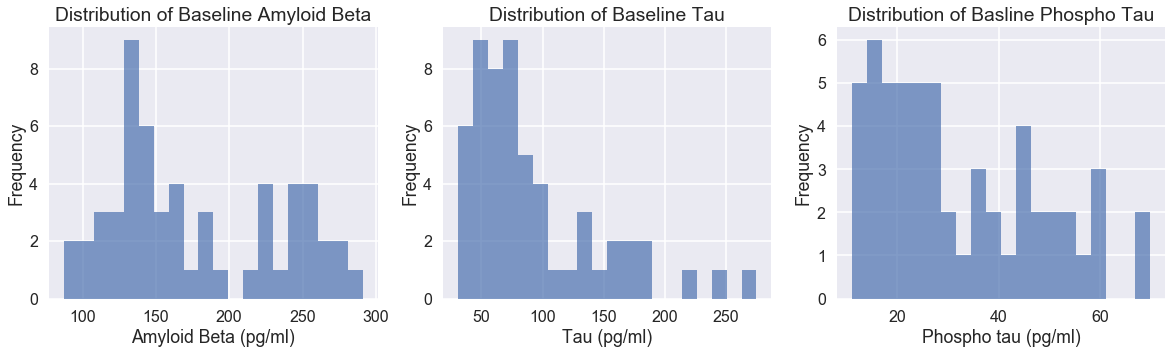

In [16]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(x=data_train['ABETA'].dropna(),alpha=0.7,bins=20,label='Histogram')
ax[1].hist(x=data_train['TAU'].dropna(),alpha=0.7,bins=20,label='Histogram')
ax[2].hist(x=data_train['PTAU'].dropna(),alpha=0.7,bins=20,label='Histogram')
ax[0].set_xlabel("Amyloid Beta (pg/ml)")
ax[1].set_xlabel("Tau (pg/ml)")
ax[2].set_xlabel("Phospho tau (pg/ml)")
ax[0].set_ylabel("Frequency")
ax[1].set_ylabel("Frequency")
ax[2].set_ylabel("Frequency")
ax[0].set_title('Distribution of Baseline Amyloid Beta')
ax[1].set_title('Distribution of Baseline Tau')
ax[2].set_title('Distribution of Basline Phospho Tau');

#### Correlation matrix

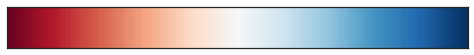

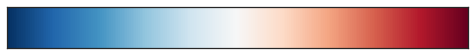

In [17]:
# Correlations between biomarkers
biomkr = data_train[['ABETA','TAU','PTAU']].dropna()
corr = pd.DataFrame(np.corrcoef(biomkr.T)) # on transposed training matrix
corr.columns = ['ABETA','TAU','PTAU']
dpal = sns.choose_colorbrewer_palette(data_type='diverging', as_cmap=True)

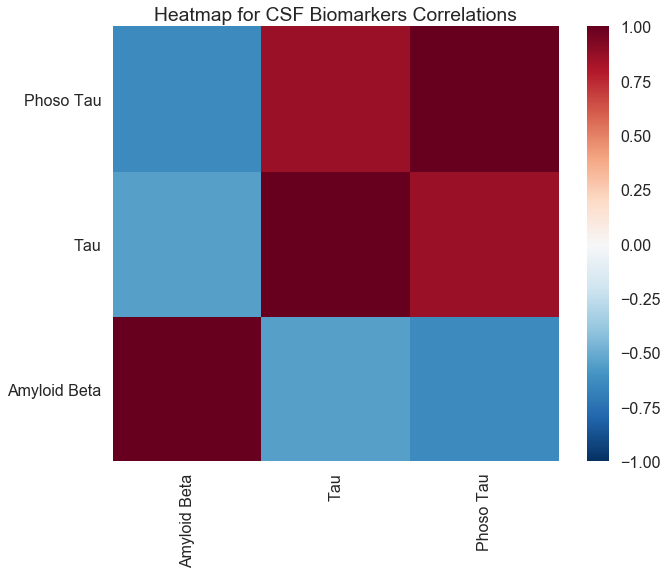

In [18]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
plt.pcolor(corr, cmap=dpal, vmin=-1, vmax=1)
plt.xticks(np.arange(biomkr.shape[1])+0.5, {'Phoso Tau','Tau','Amyloid Beta'}, rotation='vertical')
plt.yticks(np.arange(biomkr.shape[1])+0.5, {'Phoso Tau','Tau','Amyloid Beta'}, rotation='horizontal')
plt.title('Heatmap for CSF Biomarkers Correlations')
plt.colorbar();

#### Scatter plot matrix

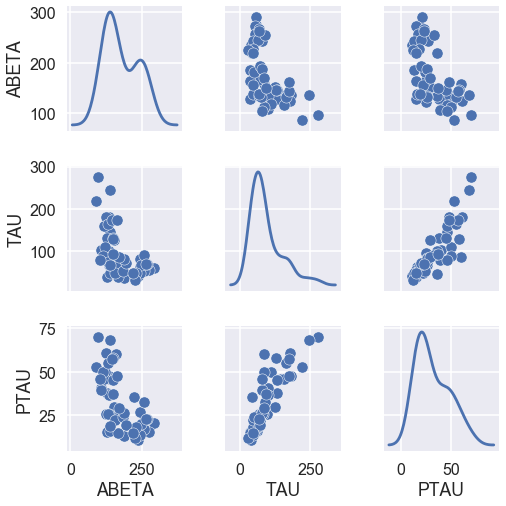

In [19]:
data_biomkr = data_train[['ABETA','TAU','PTAU']].dropna()
sns.pairplot(data_biomkr, diag_kind='kde');

- #### Interpretation
<br/>There appears to be a bimodal distribution for amyloid beta, while the tau and phosph-tau levels are right skewed. There is high positive correlation between CSF concentrations tau and phosphoryated-tau, which is unsurprising given that high concentrations of both are indicative of synaptic dysfunction and/or early neurodegeneration. Amyloid-beta concentrations, on the other hand, is negatively correlated with the other two biomarkers, which is consistent with the literature, since low concentrations of amyloid-beta suggest presence of cerebral amyloid accumulation.

#### Box plot

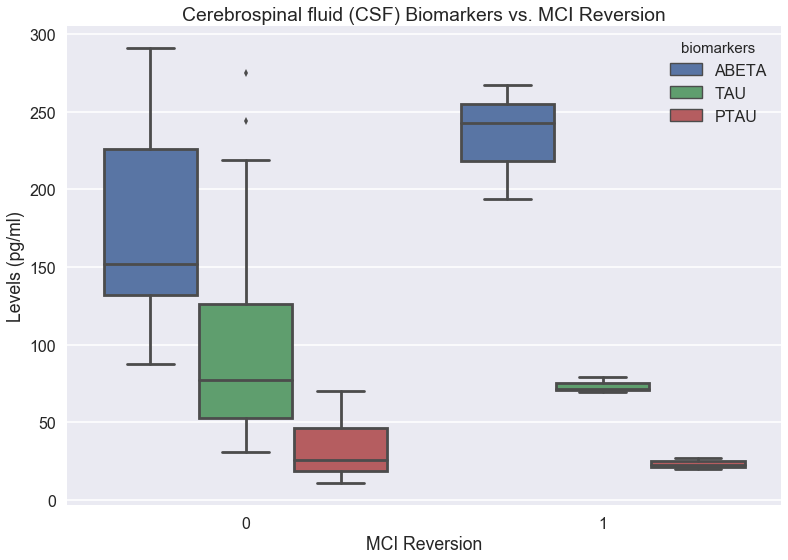

In [20]:
dd = pd.melt(data_train,id_vars=['MCI_reversion_2y'],value_vars=['ABETA','TAU','PTAU'],var_name='biomarkers')
sns.boxplot(x='MCI_reversion_2y',y='value',data=dd,hue='biomarkers')
plt.xlabel('MCI Reversion')
plt.ylabel('Levels (pg/ml)')
plt.title('Cerebrospinal fluid (CSF) Biomarkers vs. MCI Reversion');

- #### Interpretation
    - **Beta-amyloid levels at baseline (ABETA):** Based on the boxplot, people with high ABETA are more likely to reverse from MCI. We select ABETA as our potential predictor.
    - **CSF concentrations tau and phosphoryated-tau:** These two predictors are strongly correlated and both seem to be associated with MCI reversion. We selecr TAU as our potential predictor.

- #### Variable Selection
    - We select **ABETA** and **TAU** as potential predictors.

### g. Genetic factors

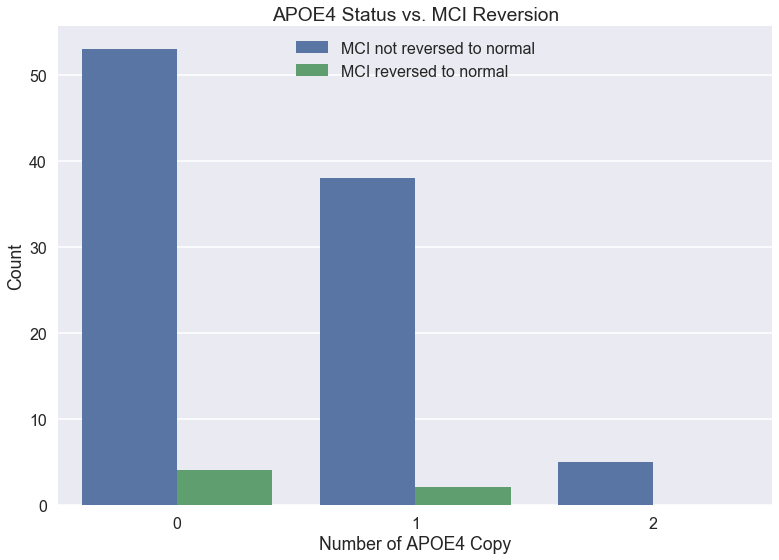

In [21]:
# APOE status vs. MCI Reversion
data_apoe = data_train[['APOE4','MCI_reversion_2y']]
sns.countplot(x='APOE4', hue='MCI_reversion_2y', data=data_apoe)
plt.title('APOE4 Status vs. MCI Reversion')
plt.xlabel('Number of APOE4 Copy')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal']);

- #### Interpretation
    - **APOE4 Status:** The APOE4 status seems to be associated with MCI reversion, but the association is not very clear based on this plot. We select APOE status as potential predictor.

- #### Variable Selection
    - We select **APOE4 Status** as potential predictor.

## 3. Summary

Based on the EDA above, we select the following variables as potential predictors for modeling: **Demographic characteristics:** Age, Gender, and Marital Status; **Clinical factors:** Homocysteine level; **Lifestyle factors:**  Baseline smoking; **Neurocognitive/neuropsychological assessments:** RAVLT_immediate, RAVLT_learning, RAVLT_forgetting, ADAS13, TMT_PtB_Complete, and Animal Fluency Score; **Cerebrospinal fluid (CSF) Biomarkers:** ABETA and TAU; **Genetic factors:** APOE4 Status.

# Part 2. Modeling and Interpretation

## 0. Import libraries

In [3]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

## 1. Data Processing

In [4]:
# Create new dataset
data_model = data[['RID','AGE', 'PTGENDER', 'PTMARRY', 'APOE4', 'ADAS13', 'RAVLT_immediate', 'RAVLT_learning', 'TMT_PtB_Complete', 
                   'ABETA', 'TAU', 'RAVLT_forgetting', 'MH16SMOK', 'CATANIMSC', 'high_homocysteine','MCI_reversion_2y',]]
data_model.head()

,RID,AGE,PTGENDER,PTMARRY,APOE4,ADAS13,RAVLT_immediate,RAVLT_learning,TMT_PtB_Complete,ABETA,TAU,RAVLT_forgetting,MH16SMOK,CATANIMSC,high_homocysteine,MCI_reversion_2y
0,6,80.4,Female,Married,0,25.67,30,1,168.0,NaN,NaN,5,0,13,0,0
1,33,83.3,Male,Married,0,25.67,21,4,NaN,129.0,110.0,6,1,16,0,0
2,51,66.5,Male,Married,2,17.67,29,1,94.0,92.5,83.1,4,0,9,0,0
3,80,85.0,Male,Married,1,21.00,23,4,81.0,NaN,NaN,3,0,17,0,0
4,98,84.4,Female,Unmarried,1,17.67,25,4,167.0,NaN,NaN,5,1,17,0,0


** Before we start fitting classification models, we notice that there are some values in the three biomarkers columns are missing.**

In [5]:
# Number of observations with missing data
print('Number of observations with missing predictors is', len(data)-len(data.dropna()))

Number of observations with missing predictors is 141


In [6]:
# Check missings for each predictors
pd.DataFrame(data_model.isnull().sum(), columns=['Number of missing'])

,Number of missing
RID,0
AGE,0
PTGENDER,0
PTMARRY,0
APOE4,0
ADAS13,1
RAVLT_immediate,0
RAVLT_learning,0
TMT_PtB_Complete,13
ABETA,86


In [7]:
# Drop predictors with missing value
data_model = data_model.drop(['TMT_PtB_Complete','ABETA','TAU','RID'],1)

**Missing Problem**
<br/>We choose to drop predictors instead of dropping observations since we only have 186 observations in our data set. We explained in our report why we did not impute the values.

In [8]:
# Divide the data for modeling into training and test set using the same seed used for EDA
np.random.seed(9001)
msk = np.random.rand(len(data_model)) < 0.6
data_train = data_model[msk]
data_test = data_model[~msk]

data_train = data_train[np.isfinite(data_train['ADAS13'])]
data_test = data_test[np.isfinite(data_test['ADAS13'])]

X_train = data_train.drop('MCI_reversion_2y',1)
y_train = data_train['MCI_reversion_2y'].values
X_test = data_test.drop('MCI_reversion_2y',1)
y_test = data_test['MCI_reversion_2y'].values

In [9]:
# Pre-process the categorical attributes - create dummy variables
attr_cats = ['PTGENDER', 'PTMARRY', 'APOE4']
x_train = pd.get_dummies(X_train, columns=attr_cats, drop_first=True)
x_test = pd.get_dummies(X_test, columns=attr_cats, drop_first=True)

# Pre-process the numerical attributes - standardize the variables
attr_nums = ['AGE', 'RAVLT_immediate', 'RAVLT_learning','RAVLT_forgetting', 'ADAS13', 'CATANIMSC']

means = {attr_num: np.mean(x_train[attr_num]) for attr_num in attr_nums}
sds = {attr_num: np.std(x_train[attr_num], ddof=1) for attr_num in attr_nums}

for attr_num in attr_nums:
    x_train[attr_num] = (x_train[attr_num] - means[attr_num]) / sds[attr_num]
    x_test[attr_num] = (x_test[attr_num] - means[attr_num]) / sds[attr_num]

- ** Data was split into 60% training set and 40% test set. **
- ** All continous variables were normalizaed:**
<br/> The majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. We notice that the range of values of raw data varies widely, these continuous features should be normalized so that each feature contributes approximately proportionately to the final distance.

In [10]:
print('Number of cases in the training set is', np.sum(y_train))

Number of cases in the training set is 6


**Imbalanced data problem**
<br/> There are many more patiants that didn't reverse (Y = 0) than reversed subjects (Y = 1). Therefore, classification accuracy may not be the best metric to evaluate a classifier's performance. As an alternative, we use the confusion matrix to evaluate the classifier.

## 2. PCA Analysis

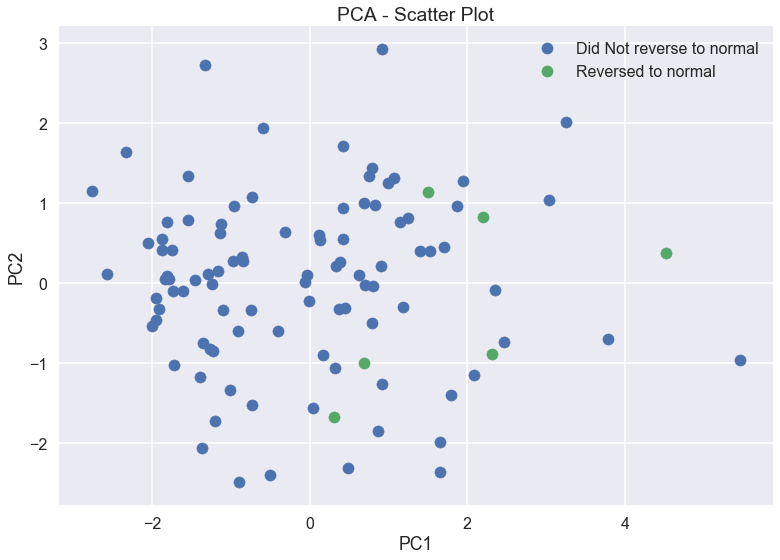

In [11]:
# Find the top two principal components for the gene expression data
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)

# Create a dataset for the top two principle components
train_pca = pd.DataFrame({'MCI reversion': y_train})
train_pca['pc1'] = x_train_pca[:,0]
train_pca['pc2'] = x_train_pca[:,1]

# Generate a scatter plot
plt.scatter(train_pca[train_pca['MCI reversion']==0]['pc1'], train_pca[train_pca['MCI reversion']==0]['pc2'], label='Did Not reverse to normal')
plt.scatter(train_pca[train_pca['MCI reversion']==1]['pc1'], train_pca[train_pca['MCI reversion']==1]['pc2'], label='Reversed to normal ')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Scatter Plot')
plt.legend();

**PCA**
<br/>Each dot here represents one sample. If we look at the blue dots, the patients who did not reverse to normal cluster on the left; the patients who reversed to normal cluster on the right.  

## 3. Classification Models

In [12]:
# Functions to calculate TPR and FPR
def tpr(confusion_matrix):
    return confusion_matrix[1][1]/np.sum(confusion_matrix[1])
def fpr(confusion_matrix):
    return confusion_matrix[0][1]/np.sum(confusion_matrix[0])

### a. Logistic Regression
We use L2 regularization in logistic regression, with the regularization parameter tuned using 5 fold cross-validation.

In [13]:
# Logistic Regression 
logistic = LogisticRegressionCV(cv=5, penalty='l2').fit(x_train, y_train)
logistic_acc_train = logistic.score(x_train, y_train)
logistic_acc_test = logistic.score(x_test, y_test)
cm_log = metrics.confusion_matrix(y_train, logistic.predict(x_train))
auc_log = metrics.roc_auc_score(y_train, logistic.predict_proba(x_train)[:,1])
auc_log_test = metrics.roc_auc_score(y_test, logistic.predict_proba(x_test)[:,1])

### b. Linear Discriminant Analysis

In [14]:
# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis().fit(x_train, y_train)
lda_acc_train = lda.score(x_train, y_train)
lda_acc_test = lda.score(x_test, y_test)
cm_lda = metrics.confusion_matrix(y_train, lda.predict(x_train))
auc_lda = metrics.roc_auc_score(y_train, lda.predict_proba(x_train)[:,1])
auc_lda_test= metrics.roc_auc_score(y_test, lda.predict_proba(x_test)[:,1])

### c. k-NN
We fit k-NN regression models to the training set using different values of k (1 to 20) and choose the best k using 5 fold cross-validation.

In [15]:
# k-NN
neighbors = np.arange(1,20)

# Perform 5-fold cross validation to choose the optimal number of neighbors
cv_scores_knn = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores_knn.append(scores.mean())

# Determine the best k
optimal_k = neighbors[np.argmax(cv_scores_knn)]
print ("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 2


In [16]:
# Fit k-NN model using the optimal number of neighbors
knn = KNeighborsClassifier(optimal_k).fit(x_train, y_train)
knn_acc_train = knn.score(x_train, y_train)
knn_acc_test = knn.score(x_test, y_test)
cm_knn = metrics.confusion_matrix(y_train, knn.predict(x_train))
auc_knn= metrics.roc_auc_score(y_train, knn.predict_proba(x_train)[:,1])
auc_knn_test = metrics.roc_auc_score(y_test, knn.predict_proba(x_test)[:,1])

### d. Decision Tree
We fit decision tree models to the training set and use 5-fold cross-validation to choose the best (maximum) depth for the tree.

In [97]:
# Decision tree
depths = np.arange(2,25)

# Use 5-fold cross-validation to choose the (maximum) depth for the tree
cv_scores_dt = []
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(dt, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores_dt.append(scores.mean())

# Determine the best (maximum) depth
best_depth = depths[np.argmax(cv_scores_dt)]
print('The best maximum depth is %d'%(best_depth))

The best maximum depth is 21


In [98]:
# Fit decision tree model using the best (maximum) depth
dt = DecisionTreeClassifier(max_depth=best_depth)
dt.fit(x_train, y_train)
dt_acc_train = dt.score(x_train, y_train)
dt_acc_test = dt.score(x_test, y_test)
cm_dt = metrics.confusion_matrix(y_train, dt.predict(x_train))
auc_dt = metrics.roc_auc_score(y_train, dt.predict_proba(x_train)[:,1])
auc_dt_test = metrics.roc_auc_score(y_test, dt.predict_proba(x_test)[:,1])

### e. Random Forest
We fit random forest models to the training set and use 5-fold cross-validation to choose the optimal value for the number of predictors and trees.

In [104]:
# Use 5-fold cross-validation to choose the optimal value for the number of predictors
n_features = np.arange(1,8)
n_trees = 2**np.arange(1,9)

cv_scores_rf = {}
for n_feature in n_features:
    for n_tree in n_trees:
        rf = RandomForestClassifier(n_estimators=n_tree, max_features=n_feature, max_depth=best_depth)
        scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy')
        cv_scores_rf[(n_feature,n_tree)] = scores.mean()
        
best_n_feature, best_n_tree = max(cv_scores_rf, key=cv_scores_rf.get)
print('The optimal value for the number of predictors is %d\nThe optimal value for the number of trees is %d'%(best_n_feature,best_n_tree))

The optimal value for the number of predictors is 4
The optimal value for the number of trees is 4


In [105]:
# Fit the RF model using the optimal number of trees and the optimal number of predictors
rf = RandomForestClassifier(n_estimators=best_n_tree, max_features=best_n_feature, max_depth=best_depth)
rf.fit(x_train, y_train)
rf_acc_train = rf.score(x_train, y_train)
rf_acc_test = rf.score(x_test, y_test)
cm_rf = metrics.confusion_matrix(y_train, rf.predict(x_train))
auc_rf= metrics.roc_auc_score(y_train, rf.predict_proba(x_train)[:,1])
auc_rf_test= metrics.roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])

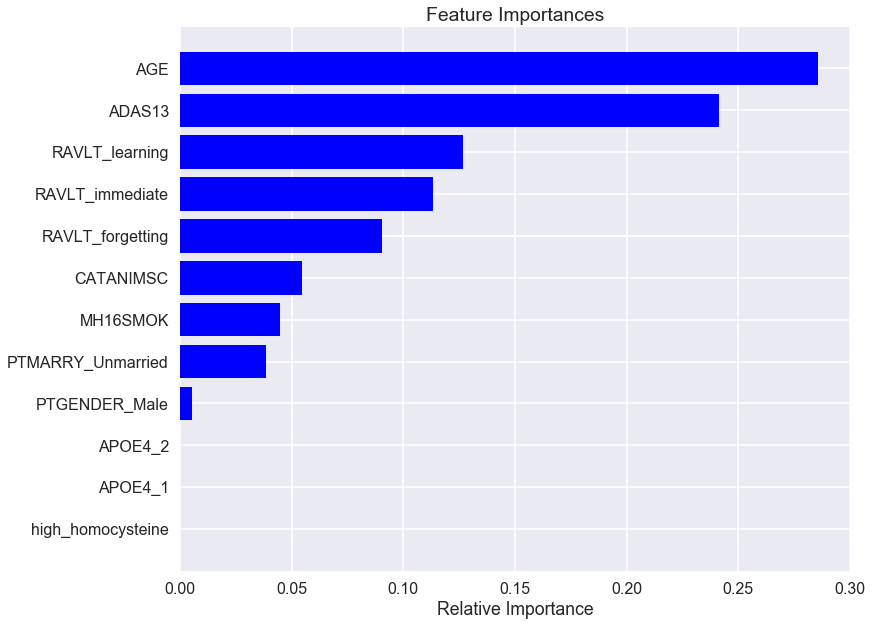

In [106]:
# Feature importance
plt.figure(figsize=(12,10))
names = x_train.columns.get_values()
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), names[indices])
plt.xlabel('Relative Importance');

### f. Boosting
We fit Boosting models to the training set and apply 5-fold cross-validation to choose the optimal number of trees for the ensemble and the optimal tree depth for the base learners.

In [86]:
# Boosting
n_tree = 2**np.arange(1,5)
depths = [2,5,10,None]

cv_scores_bo = {}
for depth in depths:
    for n in n_tree:
        adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth), n_estimators=n, learning_rate=0.05)
        scores = cross_val_score(adaboost, x_train, y_train, cv=5, scoring='accuracy')
        cv_scores_bo[(depth,n)] = scores.mean()
best_depth, best_n_tree = max(cv_scores_bo, key=cv_scores_bo.get)
print('The optimal maximum depth is %d\nThe optimal number of trees is %d'%(best_depth, best_n_tree))

The optimal maximum depth is 2
The optimal number of trees is 16


In [87]:
# Fit the AdaBoost model using the optimal number of trees and the optimal maximum depth
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=best_depth), n_estimators=best_n_tree, learning_rate=0.05)
adaboost.fit(x_train, y_train)
adaboost_acc_train = adaboost.score(x_train, y_train)
adaboost_acc_test = adaboost.score(x_test, y_test)
cm_adaboost = metrics.confusion_matrix(y_train, adaboost.predict(x_train))
auc_adaboost= metrics.roc_auc_score(y_train, adaboost.predict_proba(x_train)[:,1])
auc_adaboost_test= metrics.roc_auc_score(y_test, adaboost.predict_proba(x_test)[:,1])

### Model Performance

In [107]:
model = ['Logistic regression','LDA','k-NN','Decision Tree','Random Forest','Adaboost']
column = ['Training accuracy','Test accuracy','True postive rate','False postive rate','AUC_training','AUC_test']

models = pd.DataFrame(index=model, columns=column)
models['Training accuracy']=[logistic_acc_train, lda_acc_train,knn_acc_train,dt_acc_train,rf_acc_train,adaboost_acc_train]
models['Test accuracy']=[logistic_acc_test, lda_acc_test,knn_acc_test,dt_acc_test,rf_acc_test,adaboost_acc_test]
models['True postive rate']=[tpr(cm_log), tpr(cm_lda),tpr(cm_knn),tpr(cm_dt),tpr(cm_rf),tpr(cm_adaboost)]
models['False postive rate']=[fpr(cm_log), fpr(cm_lda),fpr(cm_knn),fpr(cm_dt),fpr(cm_rf),fpr(cm_adaboost)]
models['AUC_training']=[auc_log, auc_lda,auc_knn,auc_dt,auc_rf,auc_adaboost]
models['AUC_test']=[auc_log_test, auc_lda_test,auc_knn_test,auc_dt_test,auc_rf_test,auc_adaboost_test]
models

,Training accuracy,Test accuracy,True postive rate,False postive rate,AUC_training,AUC_test
Logistic regression,0.941176,0.915663,0.000000,0.000000,0.878472,0.832707
LDA,0.950980,0.891566,0.333333,0.010417,0.947917,0.642857
k-NN,0.941176,0.903614,0.000000,0.000000,0.973958,0.588346
Decision Tree,1.000000,0.903614,1.000000,0.000000,1.000000,0.558271
Random Forest,0.980392,0.915663,0.666667,0.000000,1.000000,0.884398
Adaboost,1.000000,0.915663,1.000000,0.000000,1.000000,0.654135


- **Interpretation for model performance**
    - Not surprisingly, the differences of accuracies are too small for us to select the best classifier. The dataset is extremely imbalanced with the majority of non-reverters (Y=0). The classificaton accuracies are not very different from the all 0's classifier that classifies everyone as non-reverter.
    - First, we use the true postive rate to evaluate a classifier's performance. Decision tree, random forest and adabosting are better than other models since they have relatively high TPR; The false postive rate is low for all models; Then, we compare the AUC on the test set for the three selected models. Random forest has the largest AUC_test. Therefore, we select the random forest model as our final model.
    - From the variable importance, we notice that Age, ADAS13, RAVLT measurements, and Animal Fluency Score are realtive important.
        - Age: 
        - ADAS13: 
        - RAVLT measurements:
        - Animal Fluency Score:

### ROC curve for our best model - Random Forest

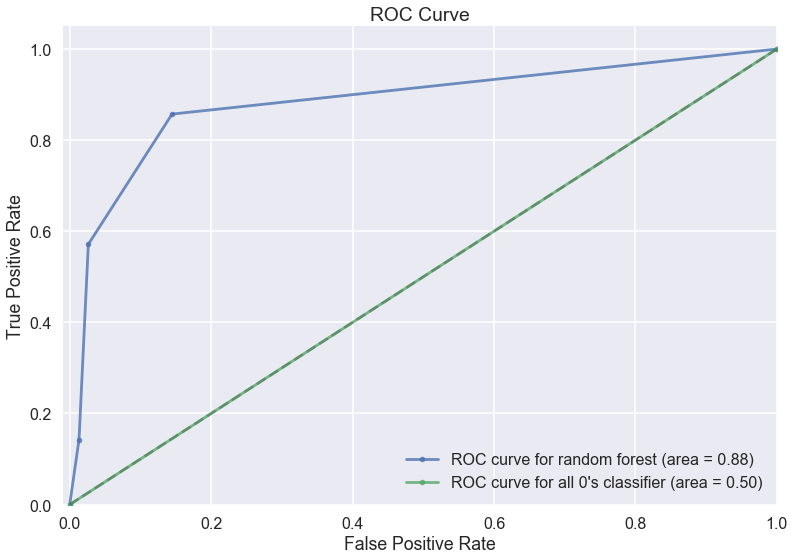

In [110]:
# Display the ROC curve for both the fitted classifier and the all 0's classifier on the test set. 
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, rf.predict_proba(x_test)[:,1])
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, np.zeros(len(y_test)))
auc1 = metrics.roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])
auc2 = metrics.roc_auc_score(y_test, np.zeros(len(y_test)))
plt.plot(fpr1, tpr1, '.-', alpha=0.8, label='ROC curve for random forest (area = %0.2f)' % (auc1))
plt.plot(fpr2, tpr2, '.-', alpha=0.8, label='ROC curve for all 0\'s classifier (area = %0.2f)' % (auc2))
plt.plot([0, 1], [0, 1], 'k--', alpha=0.2)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right");

- **Interpretation for ROC curve**
<br/>The ROC curve shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity). Our ROC close to the left-hand border and then the top border of the ROC space, which indicates a good performance in terms of sensitivity and specificity for our final random forest model.

# Part 3. Conclusion and Discussion